## Question 3: What is the five Education Types more common?  

Here we'll import some libraries

In [1]:
import pandas as pd              # Use to read the data 
import matplotlib.pyplot as plt  # To create a graphic 

Reading the file 

In [2]:
df_public = pd.read_csv('survey_results_public.csv') # Reading the data 
df_public.head()  # Showing some (five) lines 

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Modeling and clearing the data

We'll use just one column: EducationTypes. 

And we'll dropping all the lines that has an empty value in column "EducationTypes".

In [3]:
# To get just the EducationTypes
new_df = df_public[['EducationTypes']].dropna(axis=0, how='any')
# To save the EducationTypes  
education_types_dict = {}

for index, row in new_df.iterrows():
    # line is now a list of each EducationTypes
    line = row['EducationTypes'].split(';')
    
    for item in line:
        # To make all keys standardized
        item = item.strip().capitalize()
        # If the item already exist. So we'll sum the count
        if item in education_types_dict:
            education_types_dict[item] += 1 
        # Else, we'll start with count 1
        else:
            education_types_dict[item] = 1

# Creating the DataFrame
# Note: The column name is "" because in graphic (pie) was with the column name 
# Column value is all the dict values that was built above 
# Index value is all the dict keys was built above 
df_education_types = pd.DataFrame({'': list(education_types_dict.values())}, index=list(education_types_dict.keys()))
df_education_types


,
Online course,5047
Open source contributions,4465
Self-taught,10403
Hackathon,2728
Coding competition,2428
Part-time/evening course,1579
On-the-job training,4695
Bootcamp,919
Industry certification,1686


Ordering the data to get just the five. So we'll get just the highest values

In [114]:
# Shorting the top five to build the graphic 
final_df = df_education_types.sort_values(by='', ascending=False).head()
final_df


,
Self-taught,10403
Online course,5047
On-the-job training,4695
Open source contributions,4465
Hackathon,2728


## Graphic

The graphic will show the five more common way to learn 

array([<AxesSubplot:>], dtype=object)

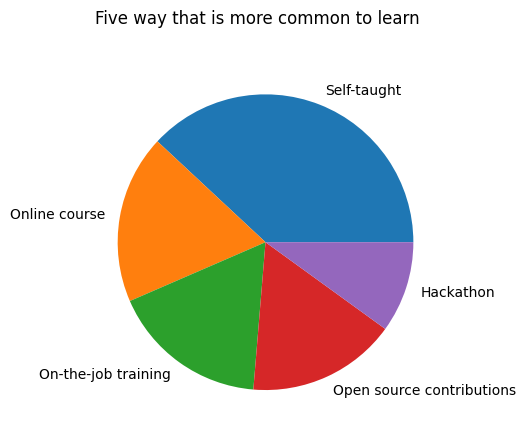

In [116]:
final_df.plot(kind='pie', subplots=True, legend=None, title='Five way that is more common to learn')

If your company encourages the staff to study. Now it know which way to learn is the most common. So your company could help your staff with a course. For instance, the online course is the seccond more common. Your maneger could provide you one online course.